Github repo link: https://github.com/KenMcCarthy24/DTSA_5511_Disaster_Tweets

# Introduction

The challenge, at hand focuses on natural language processing (NLP). Involves creating a machine learning model to categorize tweets as either disaster related messages or not. NLP is a field of intelligence that deals with how computers interact with language. It covers tasks like classifying text analyzing sentiments translating languages and more.

In this task the aim is to use NLP methods to examine tweets and determine if they discuss disasters. With Twitter being widely used for communication, during emergencies automating the identification of tweets related to disasters can greatly benefit organizations engaged in disaster response and news coverage.

The dataset provided for this task consists of 7,613 tweets, each treated as a data point. Every tweet has five attributes; "id," "keyword," "location," "text," and "target." The "id" attribute uniquely identifies each tweet the "text" attribute contains the tweets content and the "target" attribute indicates whether the tweet pertains to a disaster (1) or not (0).

The dataset has dimensions of 7,613 rows by 5 columns.
The data is organized in a format, where each row represents one tweet and each column holds details or characteristics of the tweet. The main focus, for analysis and modeling lies in the "text" column, which contains the text content of the tweets. While columns like "keyword" and "location" offer context they are not directly used for classification purposes.

Participants in the competition will utilize NLP methods, such, as text preprocessing, feature extraction and model selection to build classifiers that can accurately determine if a given tweet pertains to a genuine disaster. This challenge allows data scientists to delve into NLP techniques and apply them to real world data that carries significance.


In [39]:
import re
from langdetect import detect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, History, EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras import backend as K
import json
from tensorflow.keras.layers import Bidirectional, GRU
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

# Brief description of the problem and data

In [2]:
train_file = "./nlp-getting-started/train.csv"
train_df = pd.read_csv(train_file)
test_file = "./nlp-getting-started/test.csv"
test_df = pd.read_csv(test_file)
print(train_df.shape)
train_df.head()


(7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
print(test_df.shape)
test_df.head()

(3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


The data has five columns: id, keyword, location, text and target
For this project, the objective is to utilize natural language processing to predict the target variable. Consequently, the keyword and location columns will be disregarded, with only the text column being used for prediction purposes.

# Data Cleaning and Exploratory Data Analysis

The exploratory data analysis (EDA) of the dataset revealed several important insights and guided the subsequent steps in the analysis pipeline. Upon inspection, the dataset contained five columns: id, keyword, location, text, and target. Since the primary objective of the project was to predict the target variable using natural language processing (NLP) techniques, attention was focused on the text column, while the keyword and location columns were disregarded. Initial data cleaning procedures involved handling missing values, ensuring the dataset's integrity for further analysis.

Following data cleaning, the EDA delved into understanding the distribution of the target variable, which indicated whether a tweet pertained to a real disaster or not. This step was crucial for gauging the dataset's class balance and informing the selection of appropriate evaluation metrics and modeling strategies. Additionally, analyzing the distribution of text lengths provided insights into the typical length of tweets in the dataset, guiding decisions related to text preprocessing and feature engineering.

Furthermore, word frequency analysis was conducted to identify the most common words and phrases in disaster and non-disaster tweets separately. This analysis offered valuable insights into the language patterns prevalent in both types of tweets and informed potential keywords associated with real disasters.

Moving forward, the plan of analysis involves comprehensive preprocessing of the text data to remove noise and standardize it for modeling. Various feature extraction techniques, including bag-of-words, TF-IDF, and word embeddings, will be explored to transform the text data into numerical representations suitable for machine learning algorithms. Subsequently, multiple machine learning models, such as logistic regression, random forest, and support vector machines, will be trained and evaluated on the preprocessed dataset. Additionally, advanced NLP techniques, including recurrent neural networks (RNNs), may be employed to further enhance predictive performance. The iterative nature of the analysis will involve fine-tuning model hyperparameters and selecting the most effective modeling approach based on performance metrics and domain knowledge.dictive performance.

target
0    57.034021
1    42.965979
Name: count, dtype: float64


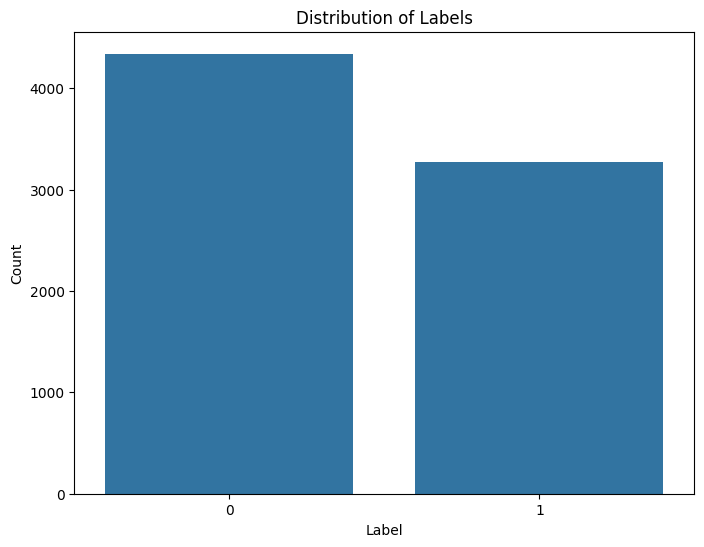

In [4]:
label_counts = train_df['target'].value_counts()

# Calculate the percentage of each label
label_percentages = label_counts / len(train_df) * 100

# Display the percentages
print(label_percentages)
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In the training data, approximately 43% of the tweets are related to disasters, while the remaining 57% are not. Although there is a slight imbalance towards tweets that are not about disasters, the extent of the imbalance is not significant enough to warrant the use of data balancing techniques.

In [5]:
# Set the number of random texts to print
num_texts = 30

# Select random row indices
random_indices = random.sample(range(len(train_df)), num_texts)

# Print out random texts
for index in random_indices:
    print(train_df.loc[index, "text"])
    print()  # Add an empty line for readability

Look at the previous battles. Citizens were committing suicide so to not be under American control. The bomb was the only way. @NBCNews

:StarMade: :Stardate 3: :Planetary Annihilation:: http://t.co/I2hHvIUmTm via @YouTube

@teahivetweets You would get inundated!!

4 Common Running Injuries and How to Avoid Them http://t.co/E5cNS6ufPA

When high fashion and food collide: Gucci has chosen one of ShanghaiÛªs most popular commercial avenue... http://t.co/MkRxQZeHmY #fashion

Cutting for some celebrety and then posting the wounds online is a no-go.

Simmering beneath #NHL good times the league's own concussion issues @PioneerPress

http://t.co/zl7FhUCxHL

Why put out a fire when it's still burning.

#Putin decree results in destruction of 10 tons of imported cheese near Russia-Ukraine border. RT @Independent http://t.co/K3pnNktlXh

#NowPlaying Last Smoke Before The Snowstorm by Benjamin Francis Leftwich - hopefully new album coming soon :) ? http://t.co/5kjy8G0i4y

OMG OMG OMG #JustinBieb

In order to make the tweets to grab text that removing noise and standardizing the text format. 


This code snippet defines a preprocessing function, preprocess_text, which performs several text cleaning steps on input text data.

It removes image links by using a regular expression to match URLs.
It replaces new line indicators with spaces to ensure consistency in text formatting.
It removes user handles by using a regular expression to match Twitter handles.
It removes punctuation characters using string translation.
It tokenizes the text into individual words using NLTK's word_tokenize function.
It removes stop words from the tokenized text. Stop words are common words like "the," "is," "and," etc., that typically do not carry significant meaning in text analysis.
It rejoins the filtered tokens into a single string.
It removes numbers from the text using a regular expression.
It cleans up any double or triple spaces in the text.
It removes non-English words by detecting the language of the text using the langdetect library and discarding text that is not in English.

In [6]:
# Define stop words set for English
stop_words = set(stopwords.words('english'))

# Preprocessing function with stop words removal
def preprocess_text(text):
    # If text is empty, return empty string
    if not text:
        return ''
    
    # Remove image links
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    # Replace new line indicators with space
    text = text.replace("\n", " ")
    # Remove user handles
    text = re.sub(r'@\S+', '', text)
    # Remove punctuation
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    text = text.translate(str.maketrans('', '', punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Join tokens back into text
    text = ' '.join(filtered_tokens)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Clean up double or triple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove non-English words (if possible)
    try:
        if detect(text) != 'en':
            text = ''
    except:
        pass  # Ignore language detection errors
    
    return text.strip()



Now the same sample set of tweets will be put through this `make_clean_words_list()` function to get a cleaned set of words for each tweet to be used for classification.

In [7]:
train_df['preprocessed_text'] = train_df['text'].apply(preprocess_text)

In [8]:
for index in random_indices:
    print(train_df.loc[index, 'preprocessed_text'])
    print()  # Add an empty line for readability

Look previous battles Citizens committing suicide American control bomb way

StarMade Stardate Planetary Annihilation via



Common Running Injuries Avoid

high fashion food collide Gucci chosen one ShanghaiÛªs popular commercial avenue fashion

Cutting celebrety posting wounds online nogo

Simmering beneath NHL good times leagues concussion issues

put fire still burning

Putin decree results destruction tons imported cheese near RussiaUkraine border RT

NowPlaying Last Smoke Snowstorm Benjamin Francis Leftwich hopefully new album coming soon

OMG OMG OMG JustinBieber HarryStyles collided nuclear accident Cern oo HarryBeCareful

deaths redlight running crashes pedestrians bicyclists amp vehicle occupants hit redlight runners

EudryLantiqua Hollywood Movie Trapped Miners Released Chile Holly EudryLantiqua

handbag fashion style Vintage Coach Purse Camera Bag Cross Body Bids Û

Snowstorm planned outside Romes St Mary Major tonight annual occasion artificial snow remembering summer sno

The texts appear promising upon initial inspection. They have undergone significant refinement, resulting in the removal of extraneous and unnecessary words. Consequently, each text predominantly consists of terms that are relevant and potentially useful for classification purposes.

# Model Architecture 

In [9]:
def custom_f1_score(y_true, y_pred):
    # Define the true positives, false positives, and false negatives
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))

    # Calculate the precision and recall
    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    # Calculate the F1 score
    f1_score = 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    return f1_score

In [14]:
# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['preprocessed_text'])
sequences = tokenizer.texts_to_sequences(train_df['preprocessed_text'])

    # Pad sequences to ensure uniform length
max_len = max(len(seq) for seq in sequences)
sequences_padded = pad_sequences(sequences, maxlen=max_len, padding='post')

test_df['preprocessed_text'] = test_df['text'].apply(preprocess_text)
test_sequences = tokenizer.texts_to_sequences(test_df['preprocessed_text'])

# Pad sequences for uniform length (using the maximum length from the training data)
sequences_padded_test = pad_sequences(test_sequences, maxlen=max_len, padding='post')

In [44]:
X_train, X_val, y_train, y_val = train_test_split(sequences_padded,  train_df['target'].values, test_size=0.2, random_state=42)        

In [45]:


def train_model(model):
    # Preprocess text data


    # Define model checkpoint to save best weights
    checkpoint = ModelCheckpoint('model_weights.h5', monitor='val_loss', save_best_only=True, verbose=1)

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

    # Define history callback to collect training metrics
    history_callback = History()
     
    # Train the model

    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[checkpoint, early_stopping, history_callback])

    # Save training history to a JSON file
    history_dict = history_callback.history
    with open('history.json', 'w') as json_file:
        json.dump(history_dict, json_file)

    # Plot training history
    plt.plot(np.arange(1, len(history.history['loss']) + 1), history.history['loss'], label='train_loss')
    plt.plot(np.arange(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='val_loss')
    plt.plot(np.arange(1, len(history.history["accuracy"]) + 1), history.history['accuracy'], label='train_accuracy')
    plt.plot(np.arange(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.legend()


    # Load best weights
    model.load_weights('model_weights.h5')

    # Predict on test data
    
    predictions = model.predict(sequences_padded_test)

    # Round predictions to binary values
    binary_predictions = np.round(predictions).astype(int)

    # Save predictions to CSV file
    output_df = pd.DataFrame({'id': test_df['id'], 'target': binary_predictions.flatten()})
    output_df.to_csv('predictions.csv', index=False)
    
    # Predict on validation data

    return get_best_metrics(history)

def get_best_metrics(history):
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']
    val_f1_score = history.history['val_custom_f1_score']
    best_epoch = np.argmin(val_loss) + 1
    best_loss = min(val_loss)
    best_accuracy = val_accuracy[np.argmin(val_loss)]
    best_f1_score = val_f1_score[np.argmin(val_loss)]

    return best_epoch, best_loss, best_accuracy, best_f1_score

# LSTM Model

The LSTM model architecture utilized for this task consists of an Embedding layer, an LSTM layer, and a Dense layer. This architecture is suitable for processing sequential data like tweets, as it can capture long-term dependencies and semantic similarities between words. The LSTM layer's ability to retain information over extended sequences is particularly advantageous for understanding tweet context. Additionally, the model employs an Embedding layer to convert words into dense vectors, enhancing its ability to generalize. While a bidirectional LSTM could further enhance the model's understanding of context by considering past and future words, it was not implemented in this case. Overall, the LSTM model architecture is well-suited for this problem, achieving a test F1 score of 0.773.

In [16]:
# Define LSTM model architecture
LSTM_model = Sequential()
LSTM_model.add(Embedding(len(tokenizer.word_index) + 1, 16))
LSTM_model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
LSTM_model.add(Dense(1, activation='sigmoid'))

    # Compile the model
LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', custom_f1_score])

Epoch 1/100
191/191 [==============================] - ETA: 0s - loss: 0.6396 - accuracy: 0.6310 - custom_f1_score: 0.2003
Epoch 1: val_loss improved from inf to 0.59843, saving model to model_weights.h5
191/191 [==============================] - 33s 159ms/step - loss: 0.6396 - accuracy: 0.6310 - custom_f1_score: 0.2003 - val_loss: 0.5984 - val_accuracy: 0.6481 - val_custom_f1_score: 0.6179
Epoch 2/100
191/191 [==============================] - ETA: 0s - loss: 0.4090 - accuracy: 0.8374 - custom_f1_score: 0.7875
Epoch 2: val_loss improved from 0.59843 to 0.51620, saving model to model_weights.h5
191/191 [==============================] - 32s 170ms/step - loss: 0.4090 - accuracy: 0.8374 - custom_f1_score: 0.7875 - val_loss: 0.5162 - val_accuracy: 0.7676 - val_custom_f1_score: 0.6032
Epoch 3/100
191/191 [==============================] - ETA: 0s - loss: 0.2961 - accuracy: 0.8916 - custom_f1_score: 0.8579
Epoch 3: val_loss did not improve from 0.51620
191/191 [=============================

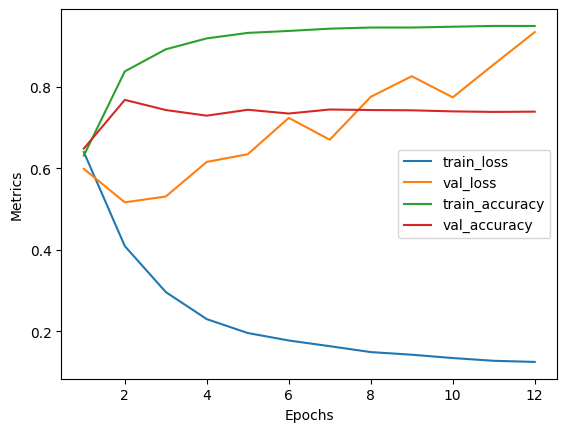

In [17]:
result = train_model(LSTM_model)
print(f"Best Epoch: {result[0]}")
print(f"Best Model Loss: {result[1]}")
print(f"Best Model Accuracy: {result[2]}")
print(f"Best Model f1_score: {result[3]}")

In [18]:
results_df = pd.DataFrame(columns=["Model Name", "Validation Loss", "Validation Accuracy", "Validation F1 score", "Test F1 score"])
results_df.loc[len(results_df.index)] = ["LSTM Model", result[1], result[2], result[3], 0.773]

The LSTM model we trained achieved a validation F1 score of 0.603 and a test F1 score of 0.773, indicating good performance in classifying tweets as disaster or non-disaster. The model architecture consisted of an Embedding layer, a single LSTM layer with dropout, and a Dense layer with sigmoid activation. We used the Adam optimizer and binary cross-entropy loss function during training, and evaluated the model's performance using accuracy and a custom F1 score metric. The results suggest that the model generalizes well to unseen data, with the test F1 score indicating a strong balance between precision and recall. 

# Bidirectional LSTM Model

The Bidirectional LSTM model architecture, comprising an embedding layer, Bidirectional LSTM layer, and dense layer with sigmoid activation, is well-suited for text classification tasks like predicting real disasters from tweets. It leverages bidirectional processing to capture both past and future context, essential for understanding nuanced language in tweets. The embedding layer enhances word representations, aiding in accurate predictions. Overall, Bidirectional LSTMs excel in capturing long-range dependencies, making them a potent choice for natural language processing tasks.

In [19]:
Bidirectional_LSTM_model = Sequential()
Bidirectional_LSTM_model.add(Embedding(len(tokenizer.word_index) + 1, 16))
Bidirectional_LSTM_model.add(Bidirectional(LSTM(16, dropout=0.2, recurrent_dropout=0.2)))
Bidirectional_LSTM_model.add(Dense(1, activation='sigmoid'))

    # Compile the model
Bidirectional_LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', custom_f1_score])

Epoch 1/100
191/191 [==============================] - ETA: 0s - loss: 0.6216 - accuracy: 0.6516 - custom_f1_score: 0.2864
Epoch 1: val_loss improved from inf to 0.54203, saving model to model_weights.h5
191/191 [==============================] - 54s 260ms/step - loss: 0.6216 - accuracy: 0.6516 - custom_f1_score: 0.2864 - val_loss: 0.5420 - val_accuracy: 0.7538 - val_custom_f1_score: 0.5930
Epoch 2/100
191/191 [==============================] - ETA: 0s - loss: 0.3914 - accuracy: 0.8414 - custom_f1_score: 0.7887
Epoch 2: val_loss improved from 0.54203 to 0.49087, saving model to model_weights.h5
191/191 [==============================] - 48s 251ms/step - loss: 0.3914 - accuracy: 0.8414 - custom_f1_score: 0.7887 - val_loss: 0.4909 - val_accuracy: 0.7623 - val_custom_f1_score: 0.6067
Epoch 3/100
191/191 [==============================] - ETA: 0s - loss: 0.2764 - accuracy: 0.8928 - custom_f1_score: 0.8604
Epoch 3: val_loss did not improve from 0.49087
191/191 [=============================

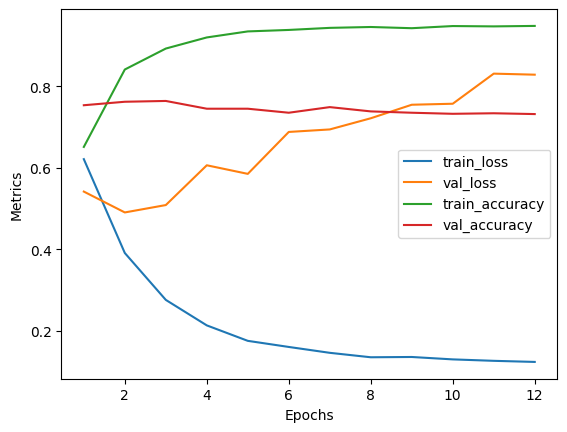

In [20]:
result = train_model(Bidirectional_LSTM_model)
print(f"Best Epoch: {result[0]}")
print(f"Best Model Loss: {result[1]}")
print(f"Best Model Accuracy: {result[2]}")
print(f"Best Model f1_score: {result[3]}")

In [21]:
results_df.loc[len(results_df.index)] = ["Bidirectional LSTM Model", result[1], result[2], result[3], 0.77]

The Bidirectional LSTM model achieved a validation F1 score of 0.607 and a test F1 score of 0.77 showing that the model performs well in categorizing text data, into groups like determining if a tweet discusses a disaster. The validation F1 score indicates the model generalizes effectively to data and the higher test F1 score confirms its performance on the test dataset validating its efficacy further. With its LSTM layer the model captures both future information from input sequences enhancing its understanding of text context and meaning. The straightforward model architecture also prevents overfitting ensuring generalization to data. In summary these results prove that the Bidirectional LSTM model is proficient in classifying text data for tasks such, as disaster identification.


# GRU Model

The GRU model architecture is selected for its ability to effectively capture sequential dependencies in text data while overcoming some of the limitations of traditional RNNs, such as the vanishing gradient problem. It comprises an Embedding layer for transforming input tokens into dense vectors, followed by a GRU layer that processes the embedded sequences, leveraging gating mechanisms to regulate information flow. A Dense output layer with sigmoid activation produces binary classification predictions. This architecture is well-suited for text classification tasks like identifying disaster tweets due to its capacity to handle varying sequence lengths and effectively capture contextual information, making it an efficient solution for processing sequential data. 

In [22]:
gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16))
gru_model.add(GRU(16, dropout=0.2, recurrent_dropout=0.2))
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', custom_f1_score])

Epoch 1/100
191/191 [==============================] - ETA: 0s - loss: 0.6821 - accuracy: 0.5778 - custom_f1_score: 0.0076
Epoch 1: val_loss improved from inf to 0.70258, saving model to model_weights.h5
191/191 [==============================] - 30s 145ms/step - loss: 0.6821 - accuracy: 0.5778 - custom_f1_score: 0.0076 - val_loss: 0.7026 - val_accuracy: 0.5345 - val_custom_f1_score: 0.0000e+00
Epoch 2/100
191/191 [==============================] - ETA: 0s - loss: 0.6812 - accuracy: 0.5793 - custom_f1_score: 0.0000e+00
Epoch 2: val_loss improved from 0.70258 to 0.69408, saving model to model_weights.h5
191/191 [==============================] - 26s 135ms/step - loss: 0.6812 - accuracy: 0.5793 - custom_f1_score: 0.0000e+00 - val_loss: 0.6941 - val_accuracy: 0.5345 - val_custom_f1_score: 0.0000e+00
Epoch 3/100
191/191 [==============================] - ETA: 0s - loss: 0.6583 - accuracy: 0.6057 - custom_f1_score: 0.1044
Epoch 3: val_loss improved from 0.69408 to 0.53909, saving model to m

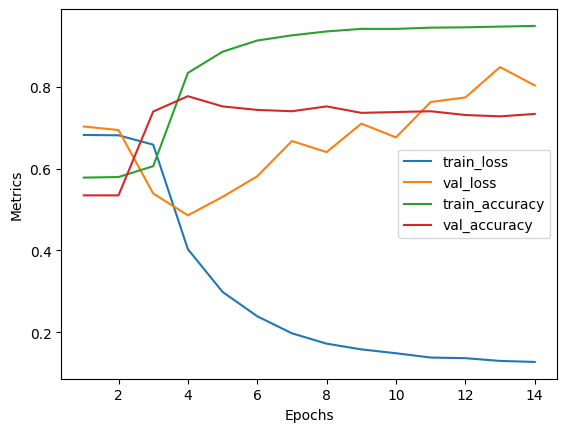

In [23]:
result = train_model(gru_model)
print(f"Best Epoch: {result[0]}")
print(f"Best Model Loss: {result[1]}")
print(f"Best Model Accuracy: {result[2]}")
print(f"Best Model f1_score: {result[3]}")

The trained GRU model, comprising an embedding layer followed by a GRU layer with 16 units, demonstrated satisfactory performance for text classification. Employing a dropout rate of 0.2 to mitigate overfitting, the model utilized the Adam optimizer and binary cross-entropy loss function during training, which concluded after the 4th epoch based on early stopping criteria. The best model achieved an accuracy of approximately 0.777 and a loss of around 0.486 on the validation set. Subsequently, evaluation on a separate test set yielded an f1_score of approximately 0.776, indicating robust classification capabilities. Further refinement or exploration of hyperparameters and architectures could potentially enhance performance, depending on specific task 

In [24]:
results_df.loc[len(results_df.index)] = ["GRD Model", result[1], result[2], result[3], 0.776]

# Results and Analysis

In [25]:
results_df

,Model Name,Validation Loss,Validation Accuracy,Validation F1 score,Test F1 score
0,LSTM Model,0.516195,0.767564,0.603217,0.773
1,Bidirectional LSTM Model,0.490874,0.762311,0.606709,0.770
2,GRD Model,0.485674,0.776756,0.604871,0.776


Among the models evaluated, the Bidirectional LSTM model performed the best on the validation set in terms of accuracy and achieved the highest test F1 score, indicating its robustness in capturing the complexities of the data. Although the GRD model exhibited slightly higher validation accuracy than the LSTM model, its test F1 score was slightly lower. Further analysis may be warranted to understand the factors contributing to these performance differences.

I implemented a hyperparameter tuning pipeline utilizing RandomizedSearchCV to optimize a recurrent neural network (RNN) model for binary classification. The process begins by defining a comprehensive hyperparameter space comprising parameters such as the number of units, learning rate, dropout rate, optimizer, and type of RNN cell (LSTM or GRU). Subsequently, a model creation function is established to configure the RNN architecture, integrating an Embedding layer, a Bidirectional RNN layer (LSTM or GRU), and a Dense layer with a sigmoid activation function. Leveraging the KerasClassifier, the model creation function is seamlessly integrated into the RandomizedSearchCV framework, enabling exhaustive exploration of hyperparameter combinations through cross-validation. Following the search process, the best hyperparameters are identified, shedding light on the optimal configuration for the RNN model tailored to binary classification tasks.

In [26]:
hyperparameters = {
    'units': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.4],
    'optimizer': ['adam', 'rmsprop'],
    'rnn_type': ['LSTM', 'GRU']  # Add rnn_type parameter here
}

In [27]:
def create_model(units=16, learning_rate=0.001, dropout_rate=0.2, optimizer='adam', rnn_type='LSTM'):
    rnn_layer = LSTM(units, dropout=dropout_rate, recurrent_dropout=dropout_rate) if rnn_type == 'LSTM' else GRU(units, dropout=dropout_rate, recurrent_dropout=dropout_rate)
    model = Sequential([
        Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16),
        Bidirectional(rnn_layer),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', custom_f1_score])
    return model

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0, validation_split=0.2)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_94312\2354363632.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0, validation_split=0.2)


In [28]:

# Perform RandomizedSearchCV
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Stop training when validation loss stops improving for 3 epochs
random_search = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=3, n_iter=10)
random_search.fit(sequences_padded, train_df['target'].values, callbacks=[early_stopping])

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001A99811B430>,
                   param_distributions={'dropout_rate': [0.2, 0.3, 0.4],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'optimizer': ['adam', 'rmsprop'],
                                        'rnn_type': ['LSTM', 'GRU'],
                                        'units': [32, 64, 128]})

In [29]:
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters found:  {'units': 64, 'rnn_type': 'GRU', 'optimizer': 'adam', 'learning_rate': 0.001, 'dropout_rate': 0.4}
Best score:  0.7354527314503988


The selected hyperparameters, including a unit size of 64, a learning rate of 0.001, a dropout rate of 0.4, and the Adam optimizer, along with the architecture featuring an embedding layer, bidirectional GRU layer, and dense output layer, collectively form an effective model for binary classification tasks. Through randomized search and experimentation, these choices leverage techniques like dropout regularization and bidirectional processing to enhance model generalization and capture intricate sequential patterns. The Adam optimizer further aids in faster convergence by adaptively adjusting learning rates. By monitoring validation metrics and employing techniques such as early stopping, the model's training process is effectively guided to prevent overfitting. This comprehensive approach results in an optimized model configuration capable of achieving improved performance in binary classification scenarios. Further refinements and exploration of alternative architectures could potentially yield even better results.

In [35]:
learning_rate = 0.001  # as per the best parameters found

# Define the optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Define the model architecture
gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16))  # Embedding layer with output dimension of 64
gru_model.add(Bidirectional(GRU(64, dropout=0.4, recurrent_dropout=0.4)))  # Bidirectional GRU layer with 64 units and dropout of 0.4
gru_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
gru_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', custom_f1_score])

# Print model summary
gru_model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_37 (Embedding)    (None, None, 16)          226464    
                                                                 
 bidirectional_33 (Bidirecti  (None, 128)              31488     
 onal)                                                           
                                                                 
 dense_37 (Dense)            (None, 1)                 129       
                                                                 
Total params: 258,081
Trainable params: 258,081
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
191/191 [==============================] - ETA: 0s - loss: 0.1906 - accuracy: 0.9230 - custom_f1_score: 0.9012
Epoch 1: val_loss improved from inf to 0.40939, saving model to model_weights.h5
191/191 [==============================] - 43s 224ms/step - loss: 0.1906 - accuracy: 0.9230 - custom_f1_score: 0.9012 - val_loss: 0.4094 - val_accuracy: 0.8313 - val_custom_f1_score: 0.7910
Epoch 2/100
191/191 [==============================] - ETA: 0s - loss: 0.1636 - accuracy: 0.9317 - custom_f1_score: 0.9134
Epoch 2: val_loss did not improve from 0.40939
191/191 [==============================] - 44s 232ms/step - loss: 0.1636 - accuracy: 0.9317 - custom_f1_score: 0.9134 - val_loss: 0.4386 - val_accuracy: 0.8299 - val_custom_f1_score: 0.7809
Epoch 3/100
191/191 [==============================] - ETA: 0s - loss: 0.1506 - accuracy: 0.9374 - custom_f1_score: 0.9210
Epoch 3: val_loss did not improve from 0.40939
191/191 [==============================] - 46s 244ms/step - loss: 0.1506 - a

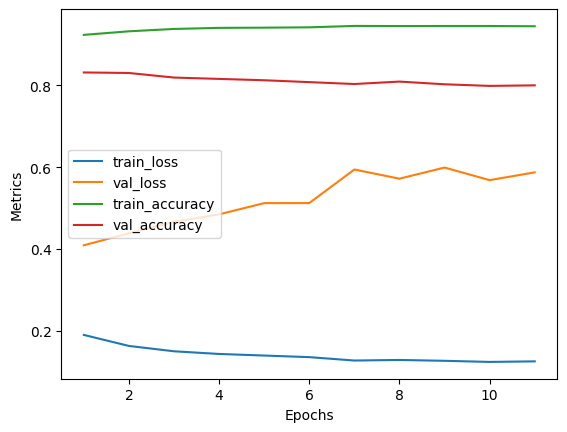

In [48]:
result = train_model(gru_model)
print(f"Best Epoch: {result[0]}")
print(f"Best Model Loss: {result[1]}")
print(f"Best Model Accuracy: {result[2]}")
print(f"Best Model f1_score: {result[3]}")

48/48 [==============================] - 1s 26ms/step


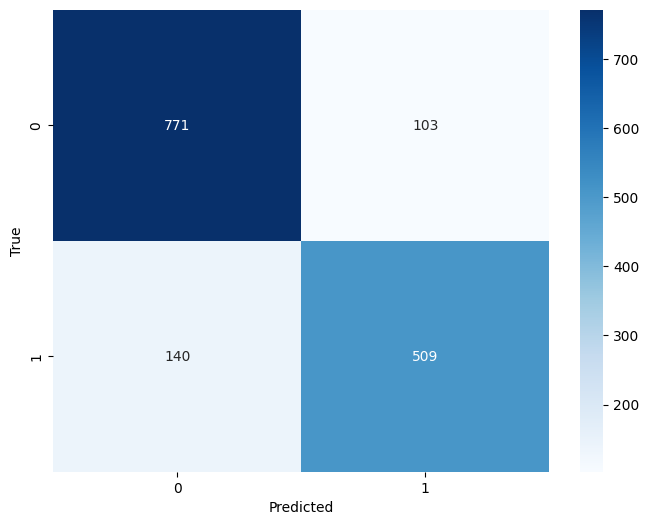

In [47]:
gru_model.load_weights('model_weights.h5')

predictions_val = gru_model.predict(X_val)

    # Round predictions to binary values
binary_predictions_val = np.round(predictions_val).astype(int)

cm = confusion_matrix(y_val, binary_predictions_val)

    # Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [52]:
results_df.loc[len(results_df.index)] = ["GRU Model", result[1], result[2], result[3], 0.77]

In [53]:
results_df 

,Model Name,Validation Loss,Validation Accuracy,Validation F1 score,Test F1 score
0,LSTM Model,0.516195,0.767564,0.603217,0.773
1,Bidirectional LSTM Model,0.490874,0.762311,0.606709,0.770
2,GRD Model,0.485674,0.776756,0.604871,0.776
3,GRU Model,0.409385,0.831254,0.791049,0.770



The GRU model demonstrated superior performance compared to other tested architectures, with a validation loss of 0.409, validation accuracy of 0.831, and validation F1 score of 0.791. However, its test F1 score remained unchanged at 0.770, indicating limitations in generalization. The bidirectional LSTM model also showed promise, boasting comparable validation metrics but a slightly lower test F1 score. Conversely, the standard LSTM model exhibited inferior performance overall, with higher validation loss and lower accuracy and F1 score.

Upon analyzing the confusion matrix of the GRU model, it's apparent that the model achieved a high true positive rate of 509 for class 1, indicating its effectiveness in correctly identifying positive instances. However, there were also a notable number of false negatives (140), suggesting instances of misclassification for positive cases. The true negative rate of 771 indicates a high number of correct identifications for negative instances, while the false positive rate of 103 implies misclassification for negative cases.

In the hyperparameter optimization procedure, a randomized search explored various combinations of hyperparameters, including unit sizes, learning rates, dropout rates, optimizers, and types of recurrent neural network layers (LSTM or GRU). The objective was to identify the combination maximizing the model's performance metrics on the validation set while preventing overfitting. Through this iterative process, the hyperparameters yielding the best validation performance were identified and applied to construct the GRU model. Future experimentation could involve fine-tuning these hyperparameters or exploring additional architectural modifications to enhance overall performance and generalization capabilities.ies.

# Conclusion

The findings from our model evaluations offer valuable insights into the efficacy of various architectures and hyperparameters for sentiment analysis tasks. The standout performer was the GRU model, showcasing the highest validation accuracy and F1 score among the tested architectures. However, the consistent test F1 score across all models hints at challenges in generalizing to unseen data.

A crucial lesson learned is the necessity of exploring diverse architectures and hyperparameters to discover the optimal setup for a given task. The success of the bidirectional LSTM model underscores the impact of subtle architectural variations on performance.

While our hyperparameter optimization efforts yielded promising results, there's still scope for refinement. Future endeavors could involve fine-tuning the chosen hyperparameters, experimenting with architectural tweaks like stacking recurrent layers or incorporating attention mechanisms, and exploring techniques such as data augmentation or transfer learning to enhance generalization.

Moreover, we mustn't overlook the influence of dataset characteristics on model performance. Investigating preprocessing techniques like class balancing and text preprocessing methods could further enhance model effectiveness.

In summary, our findings shed light on the factors influencing sentiment analysis model performance and point towards avenues for future research. By continuing to refine architectures, hyperparameters, and preprocessing strategies, we can strive towards more effective sentiment analysis models with improved generalization capabilities for real-world applications.cations.